# Introduction to audio data

In [2]:
import librosa
# Load trumpet example

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


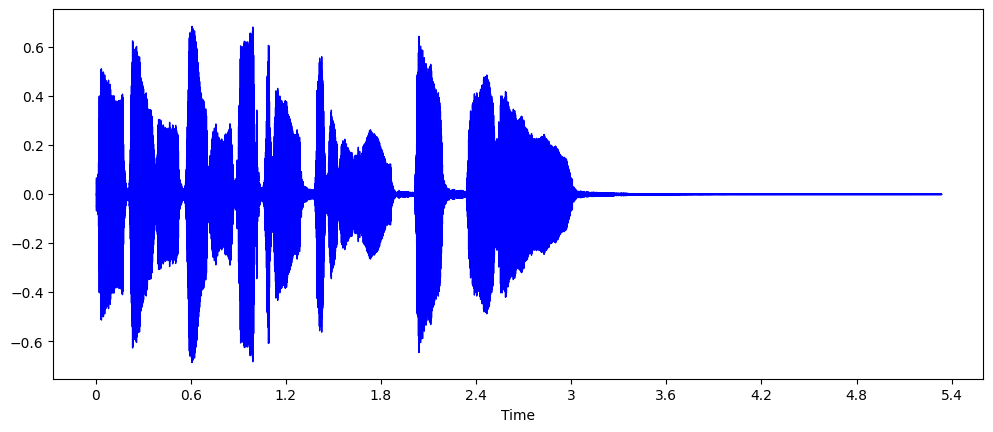

In [3]:
import matplotlib.pyplot as plt
import librosa.display
# Display waveform

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, color="blue")

In [3]:
import gradio as gr
# Listen to example

with gr.Blocks() as demo:
    gr.Audio((sampling_rate,array))

demo.launch(debug=True)

c:\Users\angel\anaconda3\envs\AIM-S2024-AudioGaming\lib\site-packages\gradio\processing_utils.py:373: UserWarning: Trying to convert audio automatically from float32 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


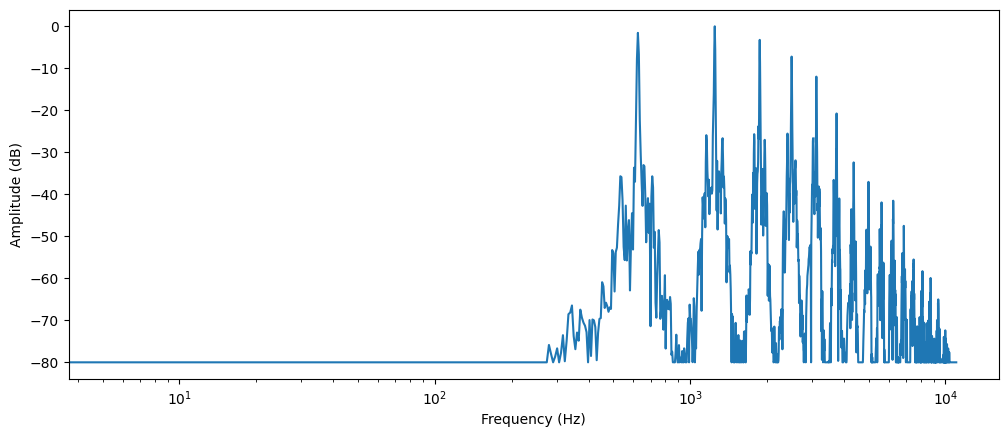

In [4]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

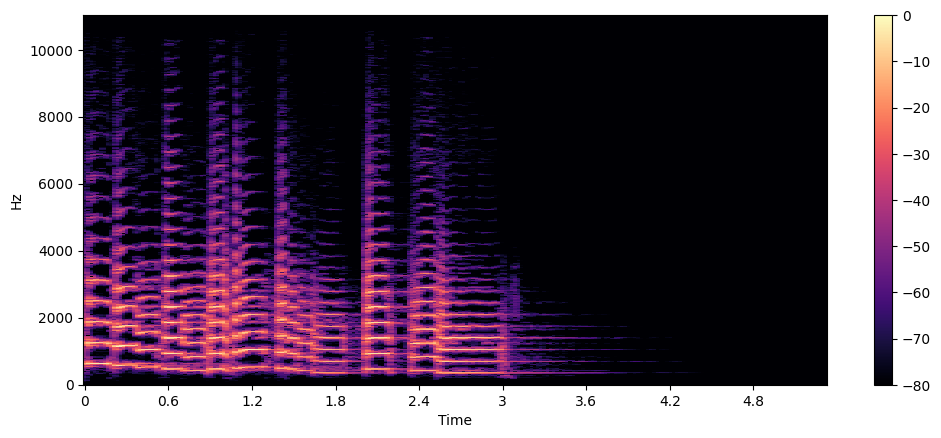

In [5]:
import numpy as np

# Display spectrogram
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

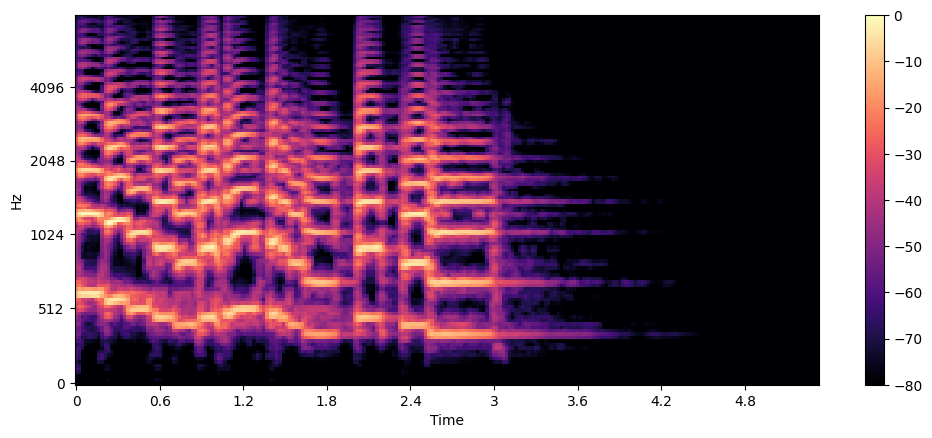

In [6]:
# Mel spectrogram
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

# Load and explore an audio dataset

In [7]:
from datasets import load_dataset

# Loads dataset by a stream
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

c:\Users\angel\anaconda3\envs\AIM-S2024-AudioGaming\lib\site-packages\datasets\load.py:1454: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [8]:
example = minds[0]
example

{'path': 'C:\\Users\\angel\\.cache\\huggingface\\datasets\\downloads\\extracted\\ed60825f81b2742f81ca8f878526891043f0e691c3470f57f2cba28bd5e390d6\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\angel\\.cache\\huggingface\\datasets\\downloads\\extracted\\ed60825f81b2742f81ca8f878526891043f0e691c3470f57f2cba28bd5e390d6\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [9]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [10]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [11]:
import gradio as gr
# Listen to a few examples

def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

c:\Users\angel\anaconda3\envs\AIM-S2024-AudioGaming\lib\site-packages\gradio\processing_utils.py:373: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


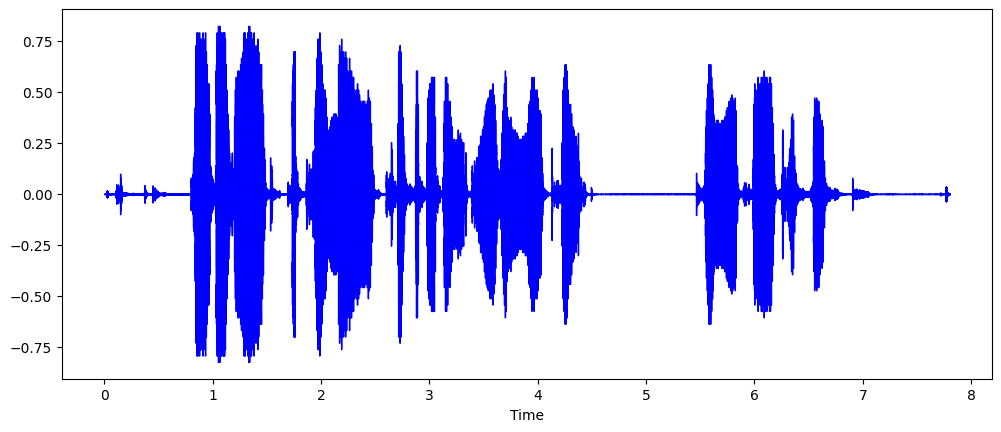

In [12]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

# Display waveform

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, color="blue")

# Preprocessing an audio dataset

In [13]:
from datasets import Audio

# cast_column tells datasets to resample to 16kHz
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [14]:
minds[0]

{'path': 'C:\\Users\\angel\\.cache\\huggingface\\datasets\\downloads\\extracted\\ed60825f81b2742f81ca8f878526891043f0e691c3470f57f2cba28bd5e390d6\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\angel\\.cache\\huggingface\\datasets\\downloads\\extracted\\ed60825f81b2742f81ca8f878526891043f0e691c3470f57f2cba28bd5e390d6\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([2.36120541e-05, 1.92325111e-04, 2.19284673e-04, ...,
         9.40908678e-04, 1.16613181e-03, 7.20883720e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

In [15]:
MAX_DURATION_IN_SECONDS = 20.0
# Filter audio over MAX_DURATION_IN_SECONDS seconds

def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

# use librosa to get example's duration from the audio file
new_column = [librosa.get_duration(path=x) for x in minds["path"]]
minds = minds.add_column("duration", new_column)

# use 🤗 Datasets' `filter` method to apply the filtering function
minds = minds.filter(is_audio_length_in_range, input_columns=["duration"])

# remove the temporary helper column
minds = minds.remove_columns(["duration"])
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 624
})

In [16]:
from transformers import WhisperFeatureExtractor
# Built-in preprocessing step: raw data -> Whisper model input

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [17]:
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [18]:
minds = minds.map(prepare_dataset)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class', 'input_features'],
    num_rows: 624
})

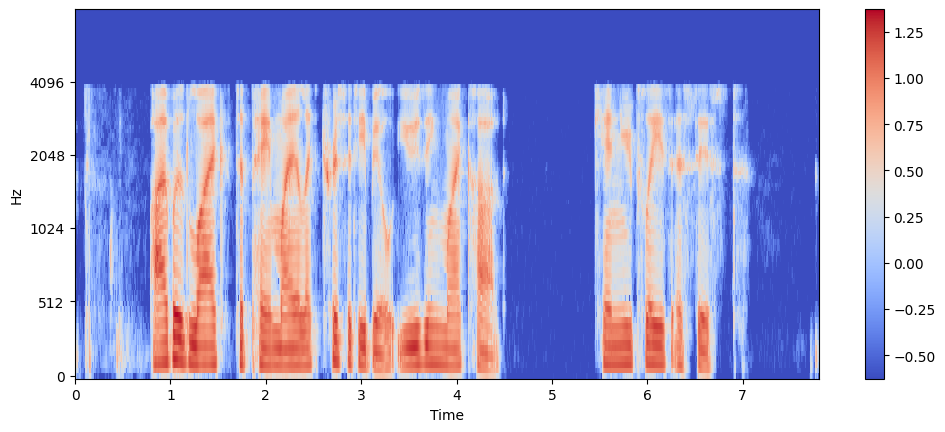

In [19]:
import numpy as np
# Visualize Whisper input

example = minds[0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

In [20]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("openai/whisper-small")

# Dataset streaming

Datasets are huge, so to avoid saving so much data to the disk, just download them on-the-fly during training

In [21]:
gigaspeech = load_dataset("speechcolab/gigaspeech", "xs", streaming=True)

DatasetNotFoundError: Dataset 'speechcolab/gigaspeech' doesn't exist on the Hub. If the repo is private or gated, make sure to log in with `huggingface-cli login`.